In [1]:
!pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests
import pandas as pd

In [2]:
API_CALL = "https://swapi.info/api/"
requests.get(API_CALL)
response = requests.get(API_CALL)

In [3]:
#Json de la api de Star Wars
SW = requests.get(API_CALL)
SW.json()

{'films': 'https://swapi.info/api/films',
 'people': 'https://swapi.info/api/people',
 'planets': 'https://swapi.info/api/planets',
 'species': 'https://swapi.info/api/species',
 'vehicles': 'https://swapi.info/api/vehicles',
 'starships': 'https://swapi.info/api/starships'}

In [4]:
# URL de las APIS
API_CALL1 = "https://swapi.info/api/species"
API_CALL2 = "https://swapi.info/api/planets"
API_CALL3 = "https://swapi.info/api/people"

In [5]:
# Json de Especies
response_species = requests.get(API_CALL1)

if response_species.status_code == 200:
    print('Request is successful')
    # GUARDAMOS los datos en una variable
    data_species = response_species.json()
    # CONVERTIMOS a DataFrame para poder graficar
    df_species = pd.DataFrame(data_species)
else:
    print('Request returned an error.')

Request is successful


In [6]:
# Json de Planetas
response_planets = requests.get(API_CALL2)

if response_planets.status_code == 200:
    print('Request is successful')
    # GUARDAMOS los datos en una variable
    data_planets = response_planets.json()
    # CONVERTIMOS a DataFrame para poder graficar
    df_planets = pd.DataFrame(data_planets)
else:
    print('Request returned an error.')

Request is successful


In [7]:
# Json de Personajes
response_people = requests.get(API_CALL3)

if response_people.status_code == 200:
    print('Request is successful')
    # GUARDAMOS los datos en una variable
    data_people = response_people.json()
    # CONVERTIMOS a DataFrame para poder graficar
    df_people = pd.DataFrame(data_people)
else:
    print('Request returned an error.')

Request is successful


In [48]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


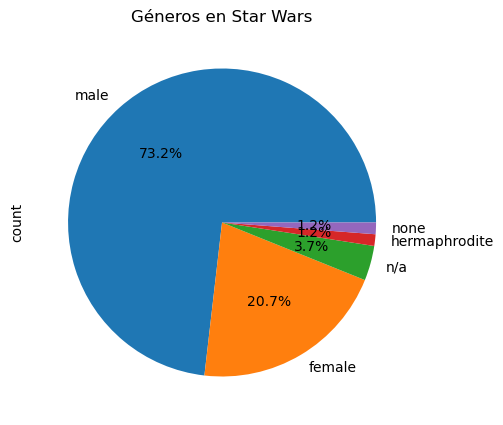

Tabla de Distribución de Género:


,Género,Cantidad,Porcentaje (%)
0,male,60,73.2
1,female,17,20.7
2,n/a,3,3.7
3,hermaphrodite,1,1.2
4,none,1,1.2


In [9]:
# TABLA PARA EL GRÁFICO DE PIE
tabla_genero = df_people['gender'].value_counts().reset_index()
tabla_genero.columns = ['Género', 'Cantidad']

total_personajes = tabla_genero['Cantidad'].sum()
tabla_genero['Porcentaje (%)'] = (tabla_genero['Cantidad'] / total_personajes * 100).round(1)

# Mostramos la tabla
print("Tabla de Distribución de Género:")
tabla_genero

In [10]:
API_SPECIES3 = "https://swapi.info/api/species"
species_data = requests.get(API_SPECIES3).json()

df_species = pd.DataFrame(species_data)

species_map = dict(zip(df_species['url'], df_species['name']))

species_list = []

for _, row in df_people.iterrows():
    if row['species']:
        for sp_url in row['species']:
            species_list.append(species_map[sp_url])
    else:
        species_list.append('Human')

species_counts = pd.Series(species_list).value_counts()


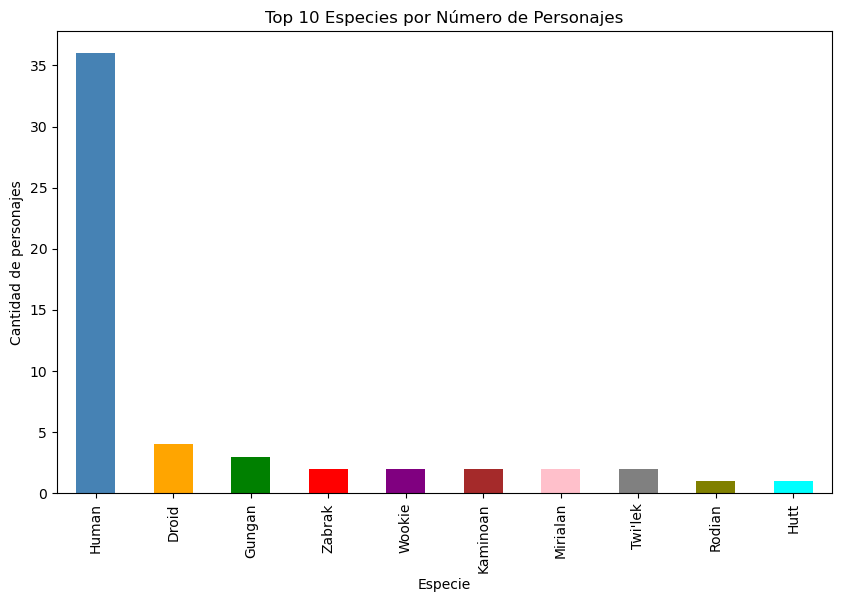

In [11]:
plt.figure(figsize=(10,6))
species_counts.head(10).plot(
    kind='bar',
    color=['steelblue','orange','green','red','purple',
           'brown','pink','gray','olive','cyan']
)

plt.title('Top 10 Especies por Número de Personajes')
plt.xlabel('Especie')
plt.ylabel('Cantidad de personajes')
plt.show()


In [12]:
df_species_table = species_counts.reset_index()
df_species_table.columns = ['Especie', 'Cantidad de personajes']

df_species_table


,Especie,Cantidad de personajes
0,Human,36
1,Droid,4
2,Gungan,3
3,Zabrak,2
4,Wookie,2
5,Kaminoan,2
6,Mirialan,2
7,Twi'lek,2
8,Rodian,1
9,Hutt,1


In [4]:
API_CALL3 = "https://swapi.info/api/people"
API_SPECIES3 = "https://swapi.info/api/species"

people = requests.get(API_CALL3).json()
species_data = requests.get(API_SPECIES3).json()

df_people = pd.DataFrame(people)
df_species = pd.DataFrame(species_data)

species_map = dict(zip(df_species['url'], df_species['name']))

rows = []

for _, row in df_people.iterrows():
    gender = row['gender']
    
    if row['species']:  # tiene especie
        for sp_url in row['species']:
            species_name = species_map.get(sp_url, 'Unknown')
            rows.append({
                'Especie': species_name,
                'Genero': gender
            })
    else:
        # Por defecto humano
        rows.append({
            'Especie': 'Human',
            'Genero': gender
        })

df_gender_species = pd.DataFrame(rows)

tabla_genero_especie = pd.crosstab(
    df_gender_species['Especie'],
    df_gender_species['Genero']
)
tabla_genero_especie['Total'] = tabla_genero_especie.sum(axis=1)
tabla_genero_especie.loc['Total'] = tabla_genero_especie.sum()


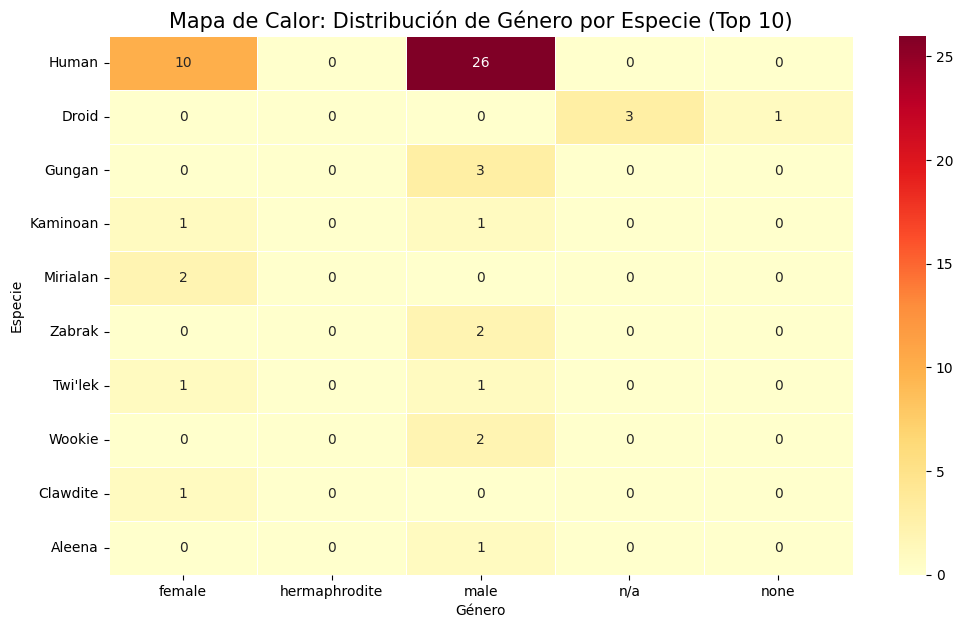

Resumen de las 10 especies más pobladas:


Genero,female,hermaphrodite,male,n/a,none,Total
Especie,,,,,,
Human,10,0,26,0,0,36
Droid,0,0,0,3,1,4
Gungan,0,0,3,0,0,3
Kaminoan,1,0,1,0,0,2
Mirialan,2,0,0,0,0,2
Zabrak,0,0,2,0,0,2
Twi'lek,1,0,1,0,0,2
Wookie,0,0,2,0,0,2
Clawdite,1,0,0,0,0,1


In [6]:
# TABLA GÉNERO-ESPECIE 

tabla_para_graficar = tabla_genero_especie.drop('Total', axis=0).sort_values(by='Total', ascending=False)

# Seleccionamos las Top 10 para que la tabla sea legible 
top_10_final = tabla_para_graficar.head(10)

# Mapa de Calor (Heatmap)
plt.figure(figsize=(12, 7))
sns.heatmap(top_10_final.drop('Total', axis=1), 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd', # Colores cálidos (Amarillo-Naranja-Rojo)
            linewidths=.5)

plt.title('Mapa de Calor: Distribución de Género por Especie (Top 10)', fontsize=15)
plt.xlabel('Género')
plt.ylabel('Especie')
plt.show()

# Mostrar la tabla resumida con el total
print("Resumen de las 10 especies más pobladas:")
top_10_final

<Figure size 1200x700 with 0 Axes>

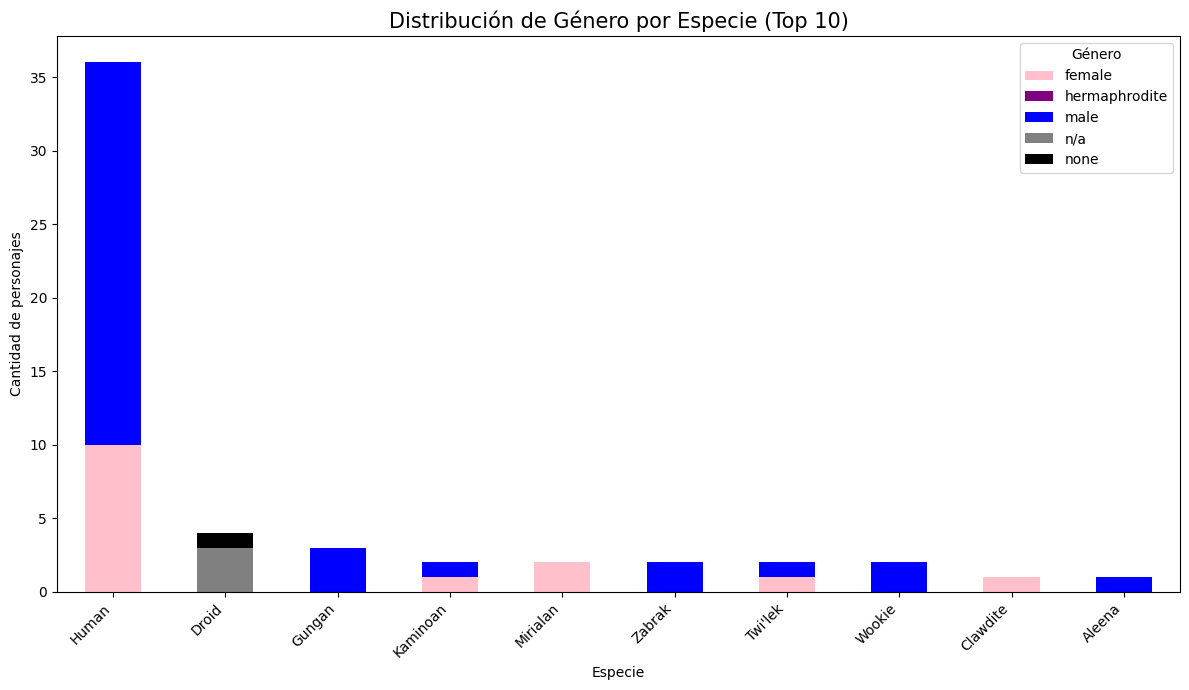

In [8]:
# Definir colores por género
gender_colors = {
    'male': 'blue',
    'female': 'pink',
    'hermaphrodite': 'purple',
    'n/a': 'gray',
    'none': 'black'
}

# Datos para graficar (sin la columna Total)
data_plot = top_10_final.drop('Total', axis=1)

# Asegurar que el orden de colores coincida con las columnas
colors = [gender_colors.get(col, 'gray') for col in data_plot.columns]

# Gráfico de barras apiladas
plt.figure(figsize=(12,7))
data_plot.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(12,7)
)

plt.title('Distribución de Género por Especie (Top 10)', fontsize=15)
plt.xlabel('Especie')
plt.ylabel('Cantidad de personajes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


In [14]:
rows = []

for _, row in df_people.iterrows():
    # especie
    if row['species']:
        species_names = [species_map.get(sp, 'Unknown') for sp in row['species']]
    else:
        species_names = ['Human']
    
    # colores de ojos
    eye_colors = [c.strip() for c in row['eye_color'].split(',')]
    
    for sp in species_names:
        for ec in eye_colors:
            rows.append({
                'Especie': sp,
                'Color_ojos': ec
            })

df_eye_species = pd.DataFrame(rows)

tabla_ojos_especie = pd.crosstab(
    df_eye_species['Especie'],
    df_eye_species['Color_ojos']
)

eye_color_palette = {
    'blue': 'royalblue',
    'brown': 'saddlebrown',
    'green': 'green',
    'yellow': 'gold',
    'red': 'red',
    'black': 'black',
    'orange': 'orange',
    'hazel': 'olive',
    'pink': 'pink',
    'unknown': 'gray'
}

top_species = species_counts.head(5).index
tabla_top = tabla_ojos_especie.loc[top_species]

colors = [
    eye_color_palette.get(col, 'gray')
    for col in tabla_top.columns
]

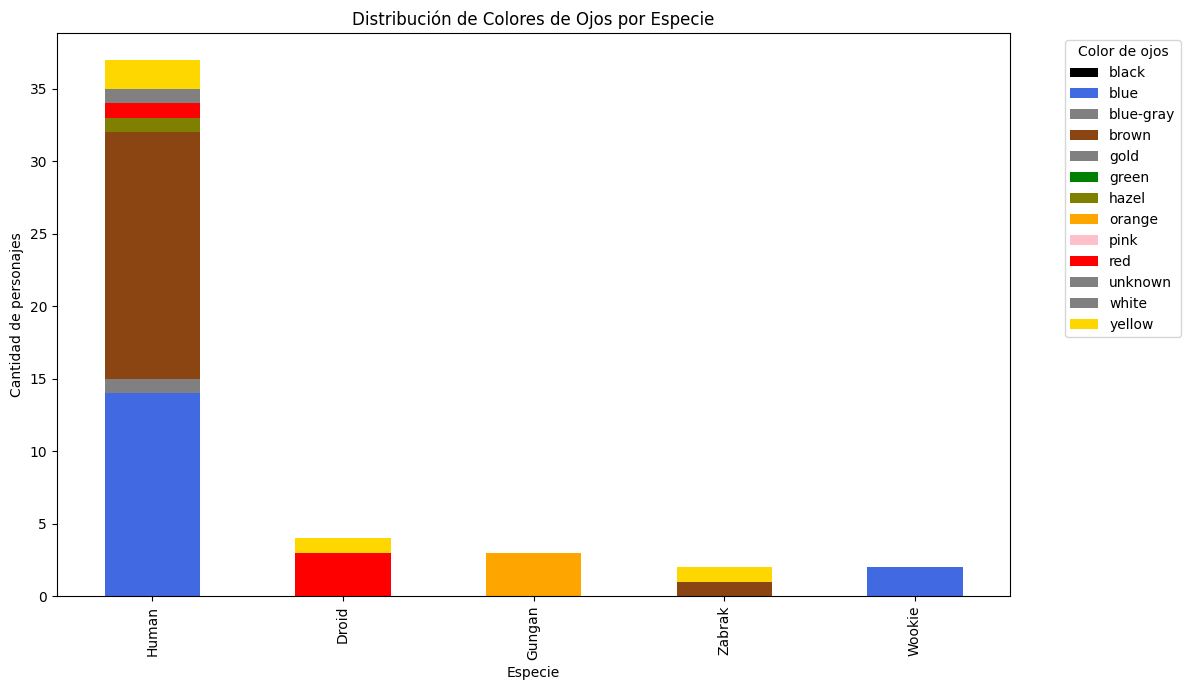

In [19]:
tabla_top.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color=colors
)

plt.title('Distribución de Colores de Ojos por Especie')
plt.xlabel('Especie')
plt.ylabel('Cantidad de personajes')
plt.legend(title='Color de ojos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
!pip install requests pandas matplotlib seaborn

TABLA DE CONTINGENCIA: ESPECIE vs COLOR DE OJOS
eye_color       black  blue  blue-gray  brown  gold  green, yellow  hazel  \
species_name                                                                
Aleena              0     0          0      0     0              0      0   
Besalisk            0     0          0      0     0              0      0   
Cerean              0     0          0      0     0              0      0   
Chagrian            0     1          0      0     0              0      0   
Clawdite            0     0          0      0     0              0      0   
Droid               0     0          0      0     0              0      0   
Dug                 0     0          0      0     0              0      0   
Ewok                0     0          0      1     0              0      0   
Geonosian           0     0          0      0     0              0      0   
Gungan              0     0          0      0     0              0      0   
Human               0    13 

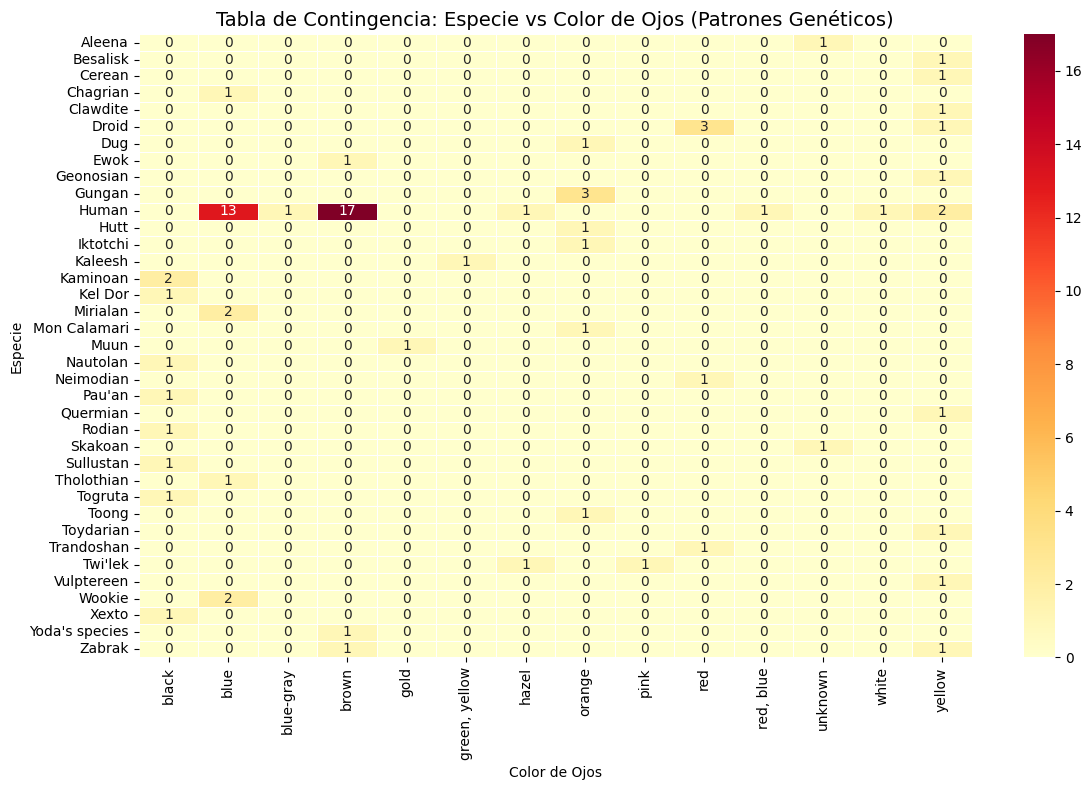

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response_people = requests.get("https://swapi.info/api/people")
data_people = response_people.json()
df_people = pd.DataFrame(data_people)

response_species = requests.get("https://swapi.info/api/species")
data_species = response_species.json()
df_species = pd.DataFrame(data_species)

species_map = dict(zip(df_species['url'], df_species['name']))

def get_species_name(species_urls):
    if species_urls and len(species_urls) > 0:
        return species_map.get(species_urls[0], 'Unknown')
    return 'Human'

df_people['species_name'] = df_people['species'].apply(get_species_name)

df_eyes_species = df_people[['name', 'eye_color', 'species_name']].copy()

contingency_table = pd.crosstab(
    df_eyes_species['species_name'], 
    df_eyes_species['eye_color'],
    margins=True,
    margins_name="Total"
)

print("="*60)
print("TABLA DE CONTINGENCIA: ESPECIE vs COLOR DE OJOS")
print("="*60)
print(contingency_table)

contingency_table.to_csv('tabla_contingencia_ojos_especie.csv')
print("\nTabla guardada como 'tabla_contingencia_ojos_especie.csv'")

plt.figure(figsize=(12, 8))
sns.heatmap(
    contingency_table.iloc[:-1, :-1],  # Excluir totales
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    linewidths=0.5
)
plt.title('Tabla de Contingencia: Especie vs Color de Ojos (Patrones Genéticos)', fontsize=14)
plt.xlabel('Color de Ojos')
plt.ylabel('Especie')
plt.tight_layout()
plt.show()